# Merging DataFrames with pandas

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-data" data-toc-modified-id="Preparing-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing data</a></span><ul class="toc-item"><li><span><a href="#Reading-multiple-data-files" data-toc-modified-id="Reading-multiple-data-files-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reading multiple data files</a></span></li><li><span><a href="#Reindexing-DataFrames" data-toc-modified-id="Reindexing-DataFrames-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reindexing DataFrames</a></span></li><li><span><a href="#Arithmetic-with-Series-&amp;-DataFrames" data-toc-modified-id="Arithmetic-with-Series-&amp;-DataFrames-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Arithmetic with Series &amp; DataFrames</a></span></li></ul></li><li><span><a href="#Concatenating-data" data-toc-modified-id="Concatenating-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Concatenating data</a></span><ul class="toc-item"><li><span><a href="#Appending-&amp;-concatenating-Series" data-toc-modified-id="Appending-&amp;-concatenating-Series-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Appending &amp; concatenating Series</a></span></li><li><span><a href="#Appending-&amp;-concatenating-DataFrames" data-toc-modified-id="Appending-&amp;-concatenating-DataFrames-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Appending &amp; concatenating DataFrames</a></span></li><li><span><a href="#Concatenation,-keys,-&amp;-MultiIndexes" data-toc-modified-id="Concatenation,-keys,-&amp;-MultiIndexes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Concatenation, keys, &amp; MultiIndexes</a></span></li><li><span><a href="#Outer-&amp;-inner-joins" data-toc-modified-id="Outer-&amp;-inner-joins-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Outer &amp; inner joins</a></span></li></ul></li><li><span><a href="#Merging-data" data-toc-modified-id="Merging-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merging data</a></span><ul class="toc-item"><li><span><a href="#Merging-DataFrames" data-toc-modified-id="Merging-DataFrames-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Merging DataFrames</a></span></li><li><span><a href="#Joining-DataFrames" data-toc-modified-id="Joining-DataFrames-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Joining DataFrames</a></span></li><li><span><a href="#Ordered-merges" data-toc-modified-id="Ordered-merges-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ordered merges</a></span></li></ul></li><li><span><a href="#Case-Study---Summer-Olympics" data-toc-modified-id="Case-Study---Summer-Olympics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Case Study - Summer Olympics</a></span><ul class="toc-item"><li><span><a href="#Quantifying-Performance" data-toc-modified-id="Quantifying-Performance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Quantifying Performance</a></span></li></ul></li></ul></div>

- How to load & manipulate data files
- Working with Pandas indexes
- concat, join, merge

## Preparing data

### Reading multiple data files

In [1]:
# Import pandas
import pandas as pd 

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Summer_Olympic_medals/Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Summer_Olympic_medals/Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Summer_Olympic_medals/Gold.csv')

# Print the first five rows of gold
print(gold.head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


In [2]:
# Import pandas
import pandas as pd

# Create the list of file names: filenames
filenames = ['Gold.csv', 'Silver.csv', 'Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv('Summer_Olympic_medals/' + filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


In [3]:
# Import pandas
import pandas as pd

# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())

   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


### Reindexing DataFrames
- indices
    - 多個index 例如，sets of indeices
- indexes
    - 整條的index 例如，these two df have different indexes

In [5]:
# Import pandas
import pandas as pd
names_1981 = pd.read_csv('Baby_names/names1981.csv', header=None,\
                         names=['name','gender','count'],\
                         index_col=(0,1))
names_1881 = pd.read_csv('Baby_names/names1881.csv', header=None,\
                         names=['name','gender','count'],\
                         index_col=(0,1))

# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

(1935, 1)
(1587, 1)


### Arithmetic with Series & DataFrames
- pd.read_csv('GDP.csv', parse_dates=True, index_col='DATE')
    - parse_dates, 是否辨識日期
- df.resample('A')
    - Resample time-series data.
    - return 'Resampler object'
    - https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html

In [17]:
import pandas as pd

# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('GDP/gdp_usa.csv', parse_dates=True, index_col='DATE')

gdp2 = pd.read_csv('GDP/gdp_usa.csv', parse_dates=False, index_col='DATE')

gdp.index, gdp2.index

(DatetimeIndex(['1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01',
                '1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
                '1949-01-01', '1949-04-01',
                ...
                '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
                '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
                '2016-01-01', '2016-04-01'],
               dtype='datetime64[ns]', name='DATE', length=278, freq=None),
 Index(['1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01', '1948-01-01',
        '1948-04-01', '1948-07-01', '1948-10-01', '1949-01-01', '1949-04-01',
        ...
        '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01', '2015-01-01',
        '2015-04-01', '2015-07-01', '2015-10-01', '2016-01-01', '2016-04-01'],
       dtype='object', name='DATE', length=278))

In [22]:
# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp.loc['2008-01-01':]

# Print the last 8 rows of post2008
post2008.tail(3)

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()
yearly2 = post2008.resample('A')

# Print yearly
yearly, yearly2

(              VALUE
 DATE               
 2008-12-31  14549.9
 2009-12-31  14566.5
 2010-12-31  15230.2
 2011-12-31  15785.3
 2012-12-31  16297.3
 2013-12-31  16999.9
 2014-12-31  17692.2
 2015-12-31  18222.8
 2016-12-31  18436.5,
 <pandas.core.resample.DatetimeIndexResampler object at 0x11665d310>)

In [15]:
# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

# Print yearly again
print(yearly)

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


In [23]:
# Import pandas
import pandas as pd

# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv('sp500.csv', parse_dates=True, index_col='Date')

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv('exchange.csv', parse_dates=True, index_col='Date')

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open', 'Close']]

# Print the head of dollars
print(dollars.head())

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis='rows')

# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893
                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


## Concatenating data

### Appending & concatenating Series

In [25]:
import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('Sales/sales-jan-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('Sales/sales-feb-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('Sales/sales-mar-2015.csv', parse_dates=True, index_col='Date')

# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

# Compute & print total sales in quarter1
print(quarter1.sum())

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64
642


In [26]:
# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

# Concatenate the list: quarter1
quarter1 = pd.concat(units)

# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64


### Appending & concatenating DataFrames
- pd.concat(medals, axis='columns')
    - axis=1, 像merge

In [29]:
#Initialize an empyy list: medals
medals =[]

for medal in ['bronze', 'silver', 'gold']:
    # Create the file name: file_name
    file_name = "Summer_Olympic_medals/%s_top5.csv" % medal
    # Create list of column names: columns
    columns = ['Country', medal]
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, header=0, index_col='Country', names=columns)
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals_df
medals_df = pd.concat(medals, axis='columns')

# Print medals_df
print(medals_df)

                bronze  silver    gold
France           475.0   461.0     NaN
Germany          454.0     NaN   407.0
Italy              NaN   394.0   460.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
United States   1052.0  1195.0  2088.0


/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


### Concatenation, keys, & MultiIndexes


In [30]:
medals =[]
medal_types = ['bronze', 'silver', 'gold']

In [32]:
for medal in medal_types:

    file_name = "Summer_Olympic_medals/%s_top5.csv" % medal
    
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)
    
# Concatenate medals: medals
medals = pd.concat(medals, keys=['bronze', 'silver', 'gold'])

# Print medals in entirety
print(medals)

                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0


In [33]:
# Sort the entries of medals: medals_sorted
medals_sorted = medals.sort_index(level=0)

# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

# Print data about silver medals
print(medals_sorted.loc['silver'])

# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:,'United Kingdom'], :])

Total    454.0
Name: (bronze, Germany), dtype: float64
                 Total
Country               
France           461.0
Italy            394.0
Soviet Union     627.0
United Kingdom   591.0
United States   1195.0
                       Total
       Country              
bronze United Kingdom  505.0
gold   United Kingdom  498.0
silver United Kingdom  591.0


In [39]:
dataframes = []
for i in ['Hardware', 'Software', 'Service']:
    filename = f'Sales/feb-sales-{i}.csv'
    dataframes.append(pd.read_csv(filename, parse_dates=True,\
                                  index_col='Date'))

# Concatenate dataframes: february
february = pd.concat(dataframes, axis=1, keys=['Hardware', 'Software', 'Service'])

# Print february.info()
print(february.info())

# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

# Create the slice: slice_2_8
slice_2_8 = february.loc['2015-02-02':'2015-02-08', idx[:, 'Company']]

# Print slice_2_8
print(slice_2_8)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-02 08:33:01 to 2015-02-26 08:58:51
Data columns (total 9 columns):
(Hardware, Company)    5 non-null object
(Hardware, Product)    5 non-null object
(Hardware, Units)      5 non-null float64
(Software, Company)    9 non-null object
(Software, Product)    9 non-null object
(Software, Units)      9 non-null float64
(Service, Company)     6 non-null object
(Service, Product)     6 non-null object
(Service, Units)       6 non-null float64
dtypes: float64(3), object(6)
memory usage: 1.6+ KB
None
                            Hardware         Software Service
                             Company          Company Company
Date                                                         
2015-02-02 08:33:01              NaN            Hooli     NaN
2015-02-02 20:54:49        Mediacore              NaN     NaN
2015-02-03 14:14:18              NaN          Initech     NaN
2015-02-04 15:36:29              NaN        Streeplex     N

In [40]:
jan, feb, mar = pd.read_csv('Sales/sales-jan-2015.csv'),\
                pd.read_csv('Sales/sales-feb-2015.csv'),\
                pd.read_csv('Sales/sales-mar-2015.csv')
# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

# Create an empty dictionary: month_dict
month_dict = {}

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()

# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

# Print sales
print(sales)

# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

                          Units
         Company               
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40
                    Units
         Company         
january  Mediacore     15
february Mediacore     45
march    Mediacore     68


### Outer & inner joins
- 

In [46]:
# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Summer_Olympic_medals/Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Summer_Olympic_medals/Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Summer_Olympic_medals/Gold.csv')

# Create the list of DataFrames: medal_list
medal_list = [bronze, silver,gold]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, axis=1, keys=['bronze', 'silver', 'gold'], join='inner')
medals2 = pd.concat(medal_list, axis=0, keys=['bronze', 'silver', 'gold'], join='inner')
# Print medals
medals

bronze                               silver                                \
       NOC               Country   Total    NOC               Country   Total   
0      USA         United States  1052.0    USA         United States  1195.0   
1      URS          Soviet Union   584.0    URS          Soviet Union   627.0   
2      GBR        United Kingdom   505.0    GBR        United Kingdom   591.0   
3      FRA                France   475.0    FRA                France   461.0   
4      GER               Germany   454.0    GER               Germany   350.0   
..     ...                   ...     ...    ...                   ...     ...   
133    SEN               Senegal     NaN    SEN               Senegal     1.0   
134    SUD                 Sudan     NaN    SUD                 Sudan     1.0   
135    TGA                 Tonga     NaN    TGA                 Tonga     1.0   
136    BDI               Burundi     NaN    BDI               Burundi     NaN   
137    UAE  United Arab Emirates     NaN    UAE  United Arab Emirates     NaN   

    gold                                
     NOC               Country   Total  
0    USA         United States  2088.0  
1    URS          Soviet Union   838.0  
2    GBR        United Kingdom   498.0  
3    FRA                France   378.0  
4    GER               Germany   407.0  
..   ...                   ...     ...  
133  SEN               Senegal     NaN  
134  SUD                 Sudan     NaN  
135  TGA                 Tonga     NaN  
136  BDI               Burundi     1.0  
137  UAE  United Arab Emirates     1.0  

[138 rows x 9 columns]

In [51]:
china, us = pd.read_csv('GDP/gdp_china.csv', parse_dates=True, index_col='Year'),\
            pd.read_csv('GDP/gdp_usa.csv', parse_dates=True, index_col='DATE')
# Resample and tidy china: china_annual
china_annual = china.resample('A').last().pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual = us.resample('A').last().pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], join='inner', axis=1)

# Resample gdp and print
print(gdp.resample('10A').last())

                 GDP     VALUE
Year                          
1970-12-31  0.546128  1.017187
1980-12-31  1.072537  1.742556
1990-12-31  0.892820  1.012126
2000-12-31  2.357522  0.738632
2010-12-31  4.011081  0.454332
2020-12-31  3.789936  0.361780


In [46]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(\
                                               index=['type'],\
                                               values='weekly_sales',\
                                               columns='is_holiday')

# Print mean_sales_by_type_holiday
mean_sales_by_type_holiday

is_holiday,False,True
type,,
A,20008.746759,21297.517824
B,12248.741339,13478.844240
C,9518.528116,9532.963131


In [53]:
test = sales.pivot_table\
            (index=['type','department'],\
            values=['weekly_sales', 'temperature_c'],\
            columns='is_holiday',\
            aggfunc=[np.mean, np.max])
test

mean                                         \
                temperature_c             weekly_sales                 
is_holiday              False      True          False         True    
type department                                                        
A    1              16.567143  10.273308  22898.516986  23733.220864   
     2              16.567143  10.273308  52119.305991  50337.081000   
     3              16.567143  10.273308  13851.535150  14273.356364   
     4              16.567143  10.273308  32897.110010  33993.978136   
     5              16.504484  10.207798  25814.567522  39944.672248   
...                       ...        ...           ...           ...   
C    95             20.156147  14.065926  50776.389110  48848.402500   
     96             20.156147  14.065926  15617.133935  17746.282333   
     97             20.156147  14.065926  13453.006754  12974.472333   
     98             20.156147  14.065926   5392.247769   6643.644833   
     99             19.211944  31.333333      8.746500      0.020000   

                         amax                                     
                temperature_c            weekly_sales             
is_holiday              False      True         False      True   
type department                                                   
A    1              37.855556  35.677778    172225.55   78415.94  
     2              37.855556  35.677778    131234.40  105498.09  
     3              37.855556  35.677778    131564.25  114230.60  
     4              37.855556  35.677778     72048.55   72179.92  
     5              37.855556  35.677778    224823.65  208505.63  
...                       ...        ...          ...        ...  
C    95             37.344444  31.700000     94764.38   82693.13  
     96             37.344444  31.700000     35217.47   41237.26  
     97             37.344444  31.700000     24459.24   24246.77  
     98             37.344444  31.700000     15154.53   22329.99  
     99             30.972222  31.333333        50.00       0.02  

[227 rows x 8 columns]

In [55]:
# the mean weekly_sales by department and type
# fill missing values with 0s
# sum all rows and cols
sales.pivot_table\
(values="weekly_sales", index="department",
 columns="type", fill_value=0, margins=True)

type,A,B,C,All
department,,,,
1,22956.887886,17990.876158,8951.733462,19213.485088
2,51994.674873,43051.996919,14424.851713,43607.020113
3,13881.033137,12965.414311,820.276818,11793.698516
4,32973.814075,21259.895804,13669.370396,25974.630238
5,26803.448045,21184.602916,767.600774,21365.583515
...,...,...,...,...
96,19900.943552,4752.674874,15766.025431,15217.211505
97,22093.807101,3543.243304,13419.542809,14437.120839
98,10979.816195,299.951644,5479.758054,6973.013875


## Merging data

### Merging DataFrames
- pd.merge()

In [59]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

### Joining DataFrames
- Which should you use?
    - `df1.append(df2)`: 
        - stacking vertically 
    - `pd.concat([df1, df2])`:
        - stacking many horizontally or vertically
        - simple inner/outer joins on Indexes
    - `df1.join(df2)`: 
        - inner/outer/left/right joins on Indexes
    - `pd.merge([df1, df2])`:
        - many joins on multiple columns

In [104]:
# Import pandas
import pandas as pd 

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Summer_Olympic_medals/Bronze.csv', index_col=['NOC', 'Country'])

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Summer_Olympic_medals/Silver.csv', index_col=['NOC', 'Country'])

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Summer_Olympic_medals/Gold.csv', index_col=['NOC', 'Country'])

In [111]:
m_c = pd.concat([gold, silver, bronze], keys=['gold', 'silver', 'bronze'], axis=1)
m_c
m_c.loc[('USA', 'United States'), ('gold', 'Total')] 

2088.0

In [116]:
m_j = gold.join(silver, how='outer', lsuffix='_gold', rsuffix='_silver').join(bronze, how='outer', rsuffix='_bronze')
m_j
m_j.columns = ['Total_gold', 'Total_silver', 'Total_bronze']
m_j
m_j.loc[('USA', 'United States'), 'Total_gold'] 

2088.0

In [119]:
# Import pandas
import pandas as pd 

# Read 'Bronze.csv' into a DataFrame: bronze
bronze1 = pd.read_csv('Summer_Olympic_medals/Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver1 = pd.read_csv('Summer_Olympic_medals/Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold1 = pd.read_csv('Summer_Olympic_medals/Gold.csv')

m_m = pd.merge(
            pd.merge(gold1, silver1, on=['NOC', 'Country'] ,\
            suffixes=('_gold', '_silver')), 
            bronze1, on=['NOC', 'Country'] ,\
            suffixes=('', '_bronze'))

m_m
m_m = m_m.set_index(['NOC', 'Country'])
m_m.columns = ['Total_gold', 'Total_silver', 'Total_bronze']
m_m

,,Total_gold,Total_silver,Total_bronze
NOC,Country,,,
USA,United States,2088.0,1195.0,1052.0
URS,Soviet Union,838.0,627.0,584.0
GBR,United Kingdom,498.0,591.0,505.0
FRA,France,378.0,461.0,475.0
GER,Germany,407.0,350.0,454.0
...,...,...,...,...
SEN,Senegal,NaN,1.0,NaN
SUD,Sudan,NaN,1.0,NaN
TGA,Tonga,NaN,1.0,NaN


### Ordered merges

In [133]:
auto = pd.read_csv('automobiles.csv', parse_dates=[6])
oil = pd.read_csv('oil_price.csv', parse_dates=[0])
auto.info(), oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg       392 non-null float64
cyl       392 non-null int64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
yr        392 non-null datetime64[ns]
origin    392 non-null object
name      392 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 27.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
Date     156 non-null datetime64[ns]
Price    156 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


(None, None)

In [134]:

# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

# Print the tail of merged
print(merged.tail())

# Resample merged: yearly
yearly = merged.resample('A', on='Date')[['mpg','Price']].mean()

# Print yearly
print(yearly)

# print yearly.corr()
print(yearly.corr())

      mpg  cyl  displ  hp  weight  accel         yr  origin             name  \
387  27.0    4  140.0  86    2790   15.6 1982-01-01      US  ford mustang gl   
388  44.0    4   97.0  52    2130   24.6 1982-01-01  Europe        vw pickup   
389  32.0    4  135.0  84    2295   11.6 1982-01-01      US    dodge rampage   
390  28.0    4  120.0  79    2625   18.6 1982-01-01      US      ford ranger   
391  31.0    4  119.0  82    2720   19.4 1982-01-01      US       chevy s-10   

          Date  Price  
387 1982-01-01  33.85  
388 1982-01-01  33.85  
389 1982-01-01  33.85  
390 1982-01-01  33.85  
391 1982-01-01  33.85  
                  mpg  Price
Date                        
1970-12-31  17.689655   3.35
1971-12-31  21.111111   3.56
1972-12-31  18.714286   3.56
1973-12-31  17.100000   3.56
1974-12-31  22.769231  10.11
1975-12-31  20.266667  11.16
1976-12-31  21.573529  11.16
1977-12-31  23.375000  13.90
1978-12-31  24.061111  14.85
1979-12-31  25.093103  14.85
1980-12-31  33.803704  32.5

## Case Study - Summer Olympics

In [1]:
#Import pandas
import pandas as pd

# Create file path: file_path
file_path = \
'Summer_Olympic_medals/Summer_Olympic_medalists_1896_to_2008_-_EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
print(editions.head())


   Edition  Grand Total       City         Country
0     1896          151     Athens          Greece
1     1900          512      Paris          France
2     1904          470  St. Louis   United States
3     1908          804     London  United Kingdom
4     1912          885  Stockholm          Sweden


In [2]:
# Import pandas
import pandas as pd

# Create the file path: file_path
file_path = \
'Summer_Olympic_medals/Summer_Olympic_medalists_1896_to_2008_-_IOC_COUNTRY_CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path, )

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country','NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND


### Quantifying Performance

In [3]:
fn=\
'Summer_Olympic_medals/'+\
'Summer_Olympic_medalists_1896_to_2008_-_ALL_MEDALISTS.tsv'
medals = pd.read_csv(fn, sep='\t', skiprows=4)
medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]

In [4]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index='Edition', values='Athlete',\
columns='NOC', aggfunc='count')

# Print the first & last 5 rows of medal_counts
medal_counts.loc[1896:1908, :'AUT']

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT
Edition,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0


In [5]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']
print(totals.loc[1896:1908])
# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
fractions.loc[1896:1908, :'AUT']

Edition
1896    151
1900    512
1904    470
1908    804
Name: Grand Total, dtype: int64


NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT
Edition,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244


In [6]:
# df.expanding, 將 df 中的每一 col 由 第一個 開始考慮, 回傳到各 row 時的 計算結果
# 
fractions.expanding().mean().loc[1896:1908, :'AUT']
# fractions.expanding().sum().loc[1896:1908, :'AUT']

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT
Edition,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.022416
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.015653
1908,NaN,NaN,NaN,0.023632,NaN,NaN,0.011505,0.012051


In [7]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index('Edition')

# Print first & last 5 rows of fractions_change
fractions_change.loc[0:4, :'AUT']

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438


In [14]:
# editions.head(), ioc_codes.head()

In [13]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
hosts.head()

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE


In [19]:
# Import pandas
import pandas as pd

# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped.NOC == 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


In [21]:
merged

,Edition,NOC,Change
0,1956,AUS,54.615063
1,2000,AUS,12.554986
2,1920,BEL,54.757887
3,1976,CAN,-2.143977
4,2008,CHN,13.251332
5,1992,ESP,32.943248
6,1952,FIN,0.121662
7,1900,FRA,198.002486
8,1924,FRA,2.046362
9,1972,FRG,35.228623


In [22]:
# Import pandas
import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts)

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

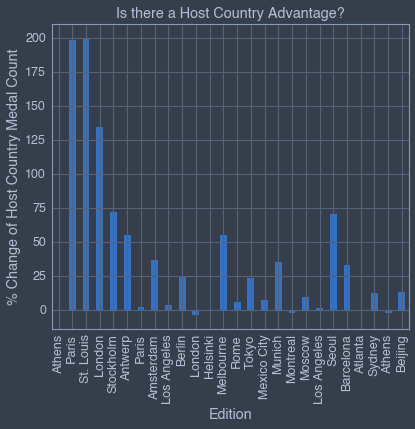

In [27]:
# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()